Logistic Regression

In [2]:
import numpy as np
np.seterr(divide='ignore')
import math
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv('bankloan.csv')

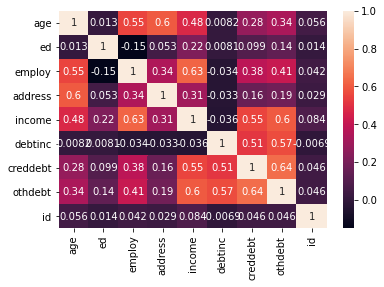

In [21]:
sns.heatmap(data.corr(), annot=True)

In [22]:
nan_value = float('NaN')
data.replace(' ', nan_value, inplace=True)
data.dropna(inplace=True)

In [23]:
data.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default', 'id'],
      dtype='object')

In [24]:
categoricalFeatures = ['income', 'creddebt',
       'othdebt']

In [25]:
for feature in categoricalFeatures:
    onehot = pd.get_dummies(data[feature], prefix=feature)
    data = data.drop(feature, axis=1)
    data = data.join(onehot)

In [26]:
lr = LogisticRegression(solver='liblinear', class_weight='balanced')

In [30]:
y = data['default']

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

In [33]:
X_train,X_test,y_train,y_test = train_test_split(data, y, test_size=0.2, random_state = 0)

In [34]:
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [35]:
y_pred = lr.predict(X_test)

([<matplotlib.axis.YTick at 0x7fed8036cd30>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

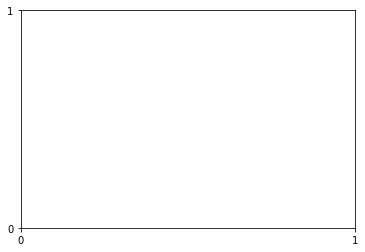

In [36]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

Text(0.5, 15.0, 'Predicted label')

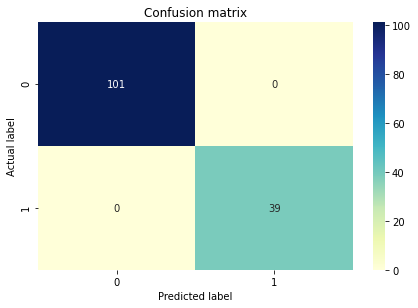

In [37]:
# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
# Print out our performance metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='1'))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label='1'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


Since the data is categorical, either based on the annual income the customer will default or not default. and hence the accuracy and precision values.

Now lets try to fit the model using Random Forest

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import time
from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble
from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from datetime import datetime, date, time, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
import matplotlib.ticker as mtick
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import svm
plt.style.use('ggplot')

In [51]:
rf = ensemble.RandomForestClassifier(
    n_estimators=200,
    criterion="gini",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features="auto",
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=1,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        39

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



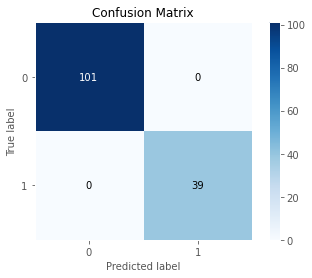

In [59]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [60]:
fi = rf.feature_importances_

In [61]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {"feature": feature_cols, "importance": rf.feature_importances_}
)

Text(0, 0.5, 'importance')

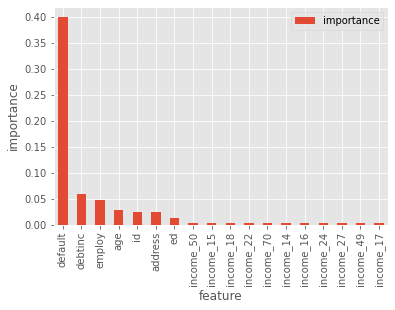

In [62]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {"feature": feature_cols[:], "importance": rf.feature_importances_[:]}
)
importance.sort_values(
    by="importance",
    axis=0,
    ascending=False,
    inplace=True,
    kind="quicksort",
    na_position="last",
)
importance[:18].plot(x="feature", y="importance", kind="bar")
plt.ylabel("importance")